#***Activity 2***

In [3]:
import pandas as pd

In [4]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=4e5fb462161dade52a220f52f2da8d984aa4d93ead588fd7d588062269ada97a
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
df = pd.read_csv('/content/apple_stock.csv')

In [ ]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.master("local[*]").appName("StockData").getOrCreate()

# Load the CSV file into a PySpark DataFrame
df = spark.read.csv('apple_stock.csv', header=True, inferSchema=True)

# Show the first 20 rows of the DataFrame
df.show(20)


+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [ ]:
# Print the schema of the DataFrame
df.printSchema()


root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [ ]:
# Get the number of rows in the DataFrame
row_count = df.count()
print(f'Number of rows: {row_count}')


Number of rows: 1762


In [ ]:
# Perform basic descriptive statistics
df.describe().show()


+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|summary|              Open|              High|               Low|            Close|             Volume|         Adj Close|
+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|  count|              1762|              1762|              1762|             1762|               1762|              1762|
|   mean| 313.0763111589103| 315.9112880164581| 309.8282405079457|312.9270656379113|9.422577587968218E7| 75.00174115607275|
| stddev|185.29946803981522|186.89817686485767|183.38391664371008|185.1471036170943|6.020518776592709E7| 28.57492972179906|
|    min|              90.0|         90.699997|         89.470001|        90.279999|           11475900|         24.881912|
|    max|        702.409988|        705.070023|        699.569977|       702.100021|          470249500|127.96609099999999|
+-------

In [ ]:
# Select key columns: "Date", "Open", "Close", "Volume"
key_columns_df = df.select("Date", "Open", "Close", "Volume")
key_columns_df.show()


+----------+------------------+------------------+---------+
|      Date|              Open|             Close|   Volume|
+----------+------------------+------------------+---------+
|2010-01-04|        213.429998|        214.009998|123432400|
|2010-01-05|        214.599998|        214.379993|150476200|
|2010-01-06|        214.379993|        210.969995|138040000|
|2010-01-07|            211.75|            210.58|119282800|
|2010-01-08|        210.299994|211.98000499999998|111902700|
|2010-01-11|212.79999700000002|210.11000299999998|115557400|
|2010-01-12|209.18999499999998|        207.720001|148614900|
|2010-01-13|        207.870005|        210.650002|151473000|
|2010-01-14|210.11000299999998|            209.43|108223500|
|2010-01-15|210.92999500000002|            205.93|148516900|
|2010-01-19|        208.330002|        215.039995|182501900|
|2010-01-20|        214.910006|            211.73|153038200|
|2010-01-21|        212.079994|        208.069996|152038600|
|2010-01-22|206.78000600

In [ ]:
from pyspark.sql.functions import col

# Calculate Daily Price Change (Close - Open)
df = df.withColumn("Price_Change", col("Close") - col("Open"))
df.select("Date", "Open", "Close", "Price_Change").show()


+----------+------------------+------------------+--------------------+
|      Date|              Open|             Close|        Price_Change|
+----------+------------------+------------------+--------------------+
|2010-01-04|        213.429998|        214.009998|  0.5799999999999841|
|2010-01-05|        214.599998|        214.379993|-0.22000499999998624|
|2010-01-06|        214.379993|        210.969995| -3.4099980000000016|
|2010-01-07|            211.75|            210.58| -1.1699999999999875|
|2010-01-08|        210.299994|211.98000499999998|   1.680010999999979|
|2010-01-11|212.79999700000002|210.11000299999998| -2.6899940000000413|
|2010-01-12|209.18999499999998|        207.720001| -1.4699939999999856|
|2010-01-13|        207.870005|        210.650002|  2.7799970000000087|
|2010-01-14|210.11000299999998|            209.43| -0.6800029999999708|
|2010-01-15|210.92999500000002|            205.93|  -4.999995000000013|
|2010-01-19|        208.330002|        215.039995|   6.709992999

In [ ]:
# Calculate average daily volume
avg_volume = df.agg({"Volume": "avg"}).collect()[0][0]
print(f"Average Daily Volume: {avg_volume}")


Average Daily Volume: 94225775.87968218


In [ ]:
# Find Maximum and Minimum Closing Prices
max_close = df.agg({"Close": "max"}).collect()[0][0]
min_close = df.agg({"Close": "min"}).collect()[0][0]
print(f"Maximum Closing Price: {max_close}")
print(f"Minimum Closing Price: {min_close}")


Maximum Closing Price: 702.100021
Minimum Closing Price: 90.279999


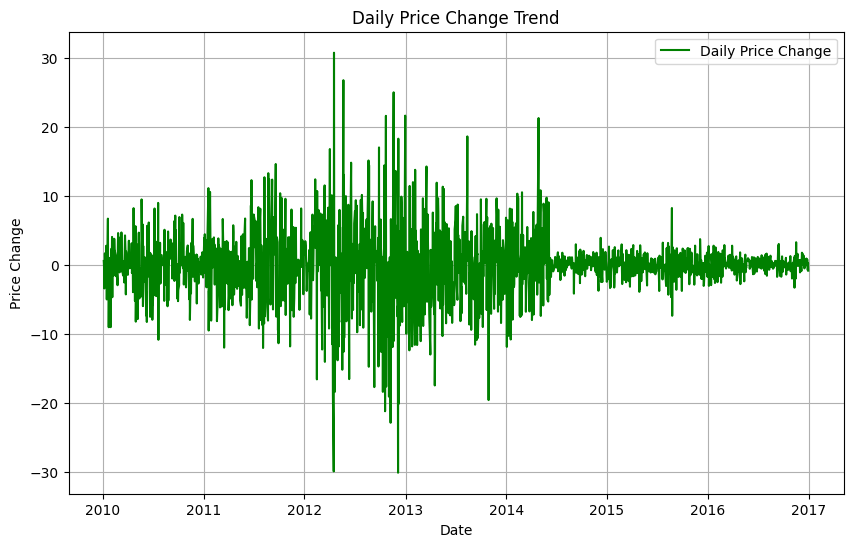

In [ ]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas for plotting
df_pandas = df.select("Date", "Price_Change").toPandas()

# Convert 'Date' column to datetime
df_pandas['Date'] = pd.to_datetime(df_pandas['Date'])

# Plot the daily price change trends
plt.figure(figsize=(10,6))
plt.plot(df_pandas['Date'], df_pandas['Price_Change'], label='Daily Price Change', color='green')
plt.title('Daily Price Change Trend')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.grid(True)
plt.legend()
plt.show()


#***Activity 3***

In [5]:
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.types import IntegerType, DoubleType
import matplotlib.pyplot as plt
import seaborn as sns
import logging


In [ ]:
# Initialize Spark Session
spark = SparkSession.builder.appName('SpeedAnalysis').getOrCreate()


In [ ]:
# Load the CSV file
df = spark.read.csv('ID_31_data.csv', header=True, inferSchema=True)

# Show first few rows of the dataset
df.show(5)


+-------------------+---------+----------+-----------+-------+--------+---+----+--------+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+
|  capturedtimestamp| latitude| longitude|      speed|geohash|   month|day|hour|      ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq|      date|             Time26|         date_time1|          

In [ ]:
# Cast 'speed' to Double and 'ID' to Integer
df = df.withColumn('speed', df['speed'].cast(DoubleType()))
df = df.withColumn('ID', df['ID'].cast(IntegerType()))
df.printSchema()  # Verify the schema changes


root
 |-- capturedtimestamp: timestamp (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- geohash: string (nullable = true)
 |-- month: double (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Custom_ID_left: string (nullable = true)
 |-- index_right: integer (nullable = true)
 |-- Custom_ID_right: string (nullable = true)
 |-- FIRST_ROUT_1: string (nullable = true)
 |-- FIRST_ROAD_1: integer (nullable = true)
 |-- FIRST_MEDI_1: integer (nullable = true)
 |-- FIRST_AADT_1: integer (nullable = true)
 |-- FIRST_NUMB_1: integer (nullable = true)
 |-- MEAN_AADT_1: double (nullable = true)
 |-- MEAN_EXPAN_1: double (nullable = true)
 |-- MEAN_PERCE_1: double (nullable = true)
 |-- MEAN_MEDIA_1: double (nullable = true)
 |-- MEAN_SURFA_1: double (nullable = true)
 |-- BUFF_DIST_1: double (nullable = true)
 |-- ORIG_FID_1: i

In [ ]:
# Convert to Spark Timestamp type
df = df.withColumn('capturedtimestamp', F.to_timestamp(df['capturedtimestamp']))
df.show(5)


+-------------------+---------+----------+-----------+-------+--------+---+----+----+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+---------------------+----------------------+----------------------+
|  capturedtimestamp| latitude| longitude|      speed|geohash|   month|day|hour|  ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq| 

In [ ]:
# Extract hour and day of the week for further analysis
df = df.withColumn('hour', F.hour(df['capturedtimestamp']))
df = df.withColumn('day_of_week', F.date_format(df['capturedtimestamp'], 'E'))
df.show(5)


+-------------------+---------+----------+-----------+-------+--------+---+----+----+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+---------------------+----------------------+----------------------+
|  capturedtimestamp| latitude| longitude|      speed|geohash|   month|day|hour|  ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq| 

In [ ]:
speed_limit = 45  # Example speed limit, adjust as needed

df = df.withColumn('fraction_5_over_limit', F.when(df['speed'] > speed_limit + 5, 1).otherwise(0))
df = df.withColumn('fraction_10_over_limit', F.when(df['speed'] > speed_limit + 10, 1).otherwise(0))
df = df.withColumn('fraction_20_over_limit', F.when(df['speed'] > speed_limit + 20, 1).otherwise(0))

# Aggregate statistics
df_stats = df.groupBy('ID').agg(
    F.mean('fraction_5_over_limit').alias('mean_fraction_5_over'),
    F.mean('fraction_10_over_limit').alias('mean_fraction_10_over'),
    F.mean('fraction_20_over_limit').alias('mean_fraction_20_over')
)
df_stats.show(5)


+----+--------------------+---------------------+---------------------+
|  ID|mean_fraction_5_over|mean_fraction_10_over|mean_fraction_20_over|
+----+--------------------+---------------------+---------------------+
|NULL|  0.6379348782634203|   0.5706776180698152| 0.019125843355822823|
+----+--------------------+---------------------+---------------------+



In [ ]:
# Set up logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Log statistics
for row in df_stats.collect():
    logger.info(f"ID: {row['ID']}, Mean 5 Over: {row['mean_fraction_5_over']}, "
                f"Mean 10 Over: {row['mean_fraction_10_over']}, Mean 20 Over: {row['mean_fraction_20_over']}")


In [ ]:
# Calculate 50th percentile (median) speed per journey
df_median_speed = df.groupBy('ID').agg(F.expr('percentile_approx(speed, 0.5)').alias('median_speed'))
df_median_speed.show(5)


+----+------------+
|  ID|median_speed|
+----+------------+
|NULL|   56.544761|
+----+------------+



In [ ]:
df_stats.show()


+----+--------------------+---------------------+---------------------+
|  ID|mean_fraction_5_over|mean_fraction_10_over|mean_fraction_20_over|
+----+--------------------+---------------------+---------------------+
|NULL|  0.6379348782634203|   0.5706776180698152| 0.019125843355822823|
+----+--------------------+---------------------+---------------------+



In [ ]:
# Convert to Pandas DataFrame
df_pandas = df.select("ID", "hour", "speed", "day_of_week").toPandas()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


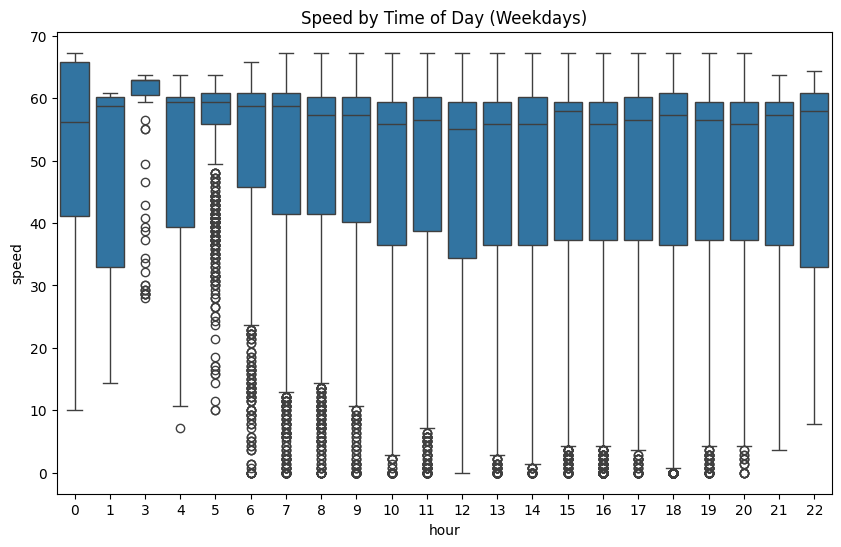

In [ ]:
# Plot speed by time of day (Weekdays)
weekdays_data = df_pandas[df_pandas['day_of_week'].isin(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])]

plt.figure(figsize=(10,6))
sns.boxplot(x='hour', y='speed', data=weekdays_data)
plt.title('Speed by Time of Day (Weekdays)')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


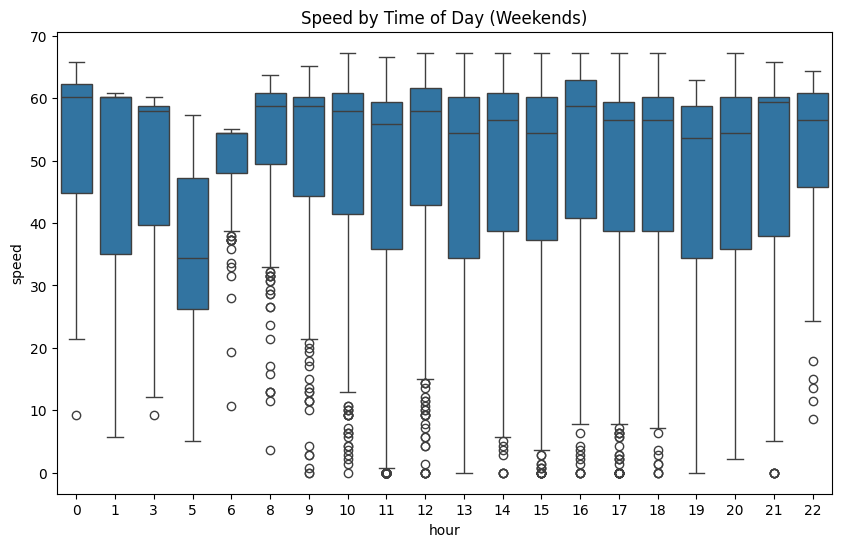

In [ ]:
# Plot speed by time of day (Weekends)
weekends_data = df_pandas[df_pandas['day_of_week'].isin(['Sat', 'Sun'])]

plt.figure(figsize=(10,6))
sns.boxplot(x='hour', y='speed', data=weekends_data)
plt.title('Speed by Time of Day (Weekends)')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


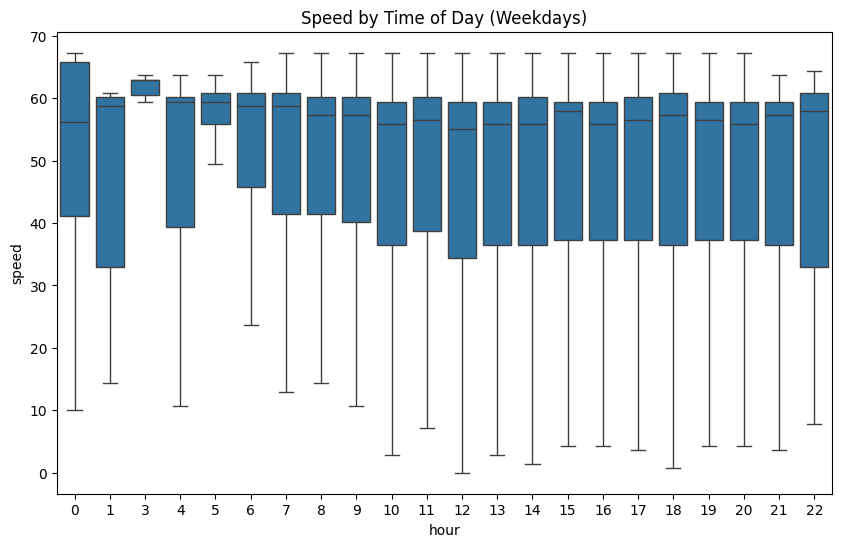

In [ ]:
# Outliers removed
# Plot speed by time of day (Weekdays)
weekdays_data = df_pandas[df_pandas['day_of_week'].isin(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])]

plt.figure(figsize=(10,6))
sns.boxplot(x='hour', y='speed', showfliers=False, data=weekdays_data)
plt.title('Speed by Time of Day (Weekdays)')
plt.show()
showfliers=False

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


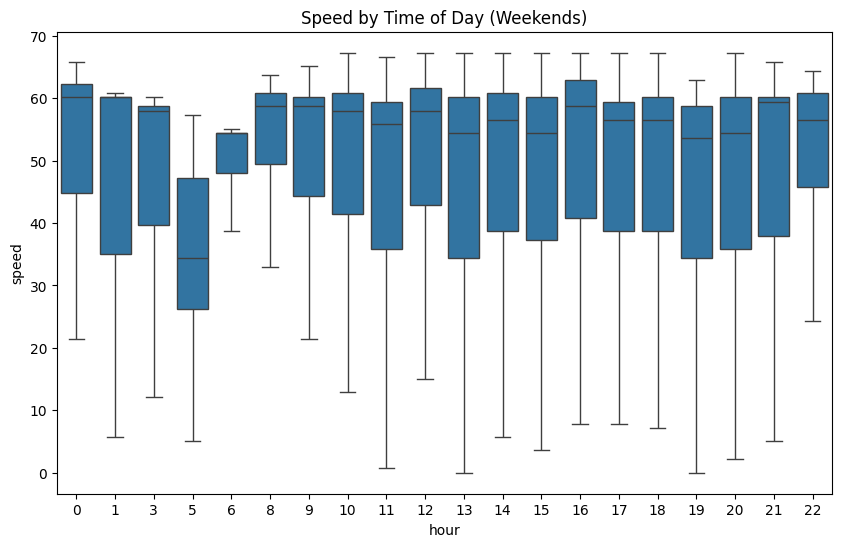

In [ ]:
# Plot speed by time of day (Weekends)
weekends_data = df_pandas[df_pandas['day_of_week'].isin(['Sat', 'Sun'])]

plt.figure(figsize=(10,6))
sns.boxplot(x='hour', y='speed', showfliers=False, data=weekends_data)
plt.title('Speed by Time of Day (Weekends)')
plt.show()


#***Activity 1***

In [19]:
# Create Spark Session
from pyspark.sql import SparkSession
import json

In [20]:
# Initialize the Spark session
spark = SparkSession.builder.appName('WejoDataAnalysis').getOrCreate()

In [22]:
# Load the JSON file into an RDD
rdd = spark.sparkContext.textFile('wejo.json')


In [23]:
# Inspect the first few rows
rdd.take(5)


['{"dataPointId":"02d77c7e-1ac8-45bc-978f-7c3855f5ff9b","journeyId":"2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc","capturedTimestamp":"2023-04-12T19:00:04.000-0500","location":{"latitude":42.497317,"longitude":-90.740595,"geohash":"9zx3z0","postalCode":"52002","regionCode":"IA","countryCode":"US"},"metrics":{"speed":38.01,"heading":359.0},"vehicle":{"wejoVehicleTypeId":8905611058720503136,"status":{"ignitionStatus":"MID_JOURNEY"}}}',
 '{"dataPointId":"03fde858-5922-446a-b68a-00167b866c6e","journeyId":"1183a6bfb3178ba00a4a8585aca72db2d4e689ad","capturedTimestamp":"2023-04-12T19:00:21.000-0500","location":{"latitude":41.658504,"longitude":-93.500216,"geohash":"9zmsbr","postalCode":"50009","regionCode":"IA","countryCode":"US"},"metrics":{"speed":41.47,"heading":90.0},"vehicle":{"wejoVehicleTypeId":-5486746399762838414,"status":{"ignitionStatus":"MID_JOURNEY"}}}',
 '{"dataPointId":"04ce2a2c-d0fd-4197-9416-9324c9a5106c","journeyId":"1c96529d9ccf86042ca98744b3f3b710c247b67d","capturedTimestamp"

In [24]:
# Parse JSON Strings into Python Dictionaries
import json # import the json module
parsed_rdd = rdd.map(lambda x: json.loads(x))

In [25]:
# Step 7: Extract Key Information (latitude, longitude, speed)
# Extracting the required fields (latitude, longitude, speed)
extracted_rdd = parsed_rdd.map(lambda x: (x['location']['latitude'], x['location']['longitude'], x['metrics']['speed']))


In [26]:
# Step 8: Filter Data Points with Speed > 30 mph
filtered_rdd = extracted_rdd.filter(lambda x: x[2] > 30)

In [27]:
# Step 9: Count the Number of Data Points with Speed > 30 mph
speed_above_30_count = filtered_rdd.count()
print(f"Number of Data Points with Speed > 30 mph: {speed_above_30_count}")


Number of Data Points with Speed > 30 mph: 2395


In [28]:
# Step 10: Collect and Display Filtered Data Points
filtered_data = filtered_rdd.collect()
print("Filtered Data Points (Speed > 30 mph):")
for data_point in filtered_data:
    print(data_point)

Filtered Data Points (Speed > 30 mph):
(42.497317, -90.740595, 38.01)
(41.658504, -93.500216, 41.47)
(41.515211, -94.232996, 36.86)
(42.0185, -93.62851, 64.51)
(41.555452, -93.633866, 55.29)
(41.753764, -93.600235, 62.2)
(42.536278, -95.190595, 63.35)
(42.007963, -93.159676, 116.35)
(41.675677, -93.424692, 124.41)
(42.015204, -91.595168, 91.0)
(41.556914, -90.559612, 64.51)
(42.017059, -91.682476, 55.29)
(41.597193, -90.477382, 52.48)
(41.589876, -90.476402, 86.39)
(41.6805496, -92.93029779999999, 120.7)
(41.599361, -93.717994, 40.32)
(42.474779, -96.108016, 105.98)
(41.559242, -93.736258, 46.08)
(43.116858, -93.004063, 116.35)
(42.023142, -93.749615, 107.13)
(41.584, -93.443251, 78.33)
(41.835825, -94.032314, 115.19)
(41.561594, -93.596981, 61.05)
(41.25701, -95.80842, 66.81)
(41.945699, -96.103528, 124.41)
(41.515914, -93.68042, 99.07)
(42.473516, -94.229182, 99.84)
(42.237266, -91.881378, 118.65)
(41.496996, -94.843401, 123.26)
(41.600496, -93.843534, 38.01)
(42.122188, -93.16823, 8

In [29]:
# Step 11: Plot the filtered data using matplotlib
import matplotlib.pyplot as plt

In [30]:
# Extract latitude and longitude from the filtered data
latitudes = [entry[0] for entry in filtered_data]
longitudes = [entry[1] for entry in filtered_data]


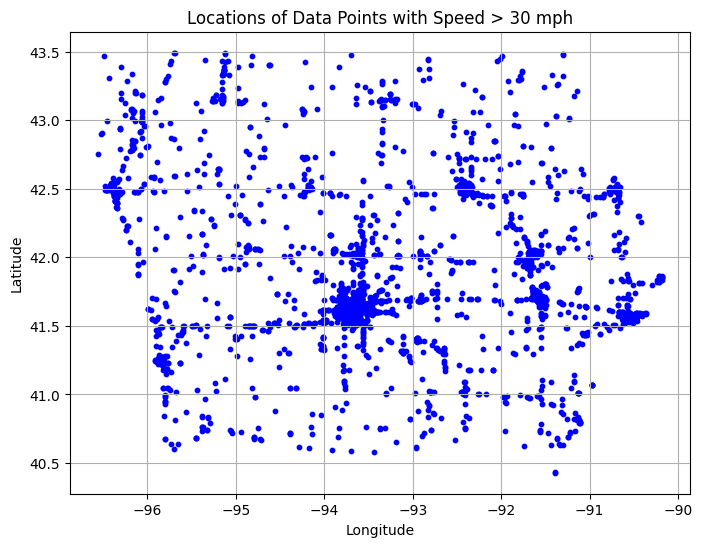

In [32]:
# Create a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(longitudes, latitudes, c='blue', marker='o', s=10)
plt.title('Locations of Data Points with Speed > 30 mph')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()